In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import matplotlib.ticker as mticker

from gsw import alpha, SA_from_SP, p_from_z, CT_from_pt, beta, sigma1, sigma2


In [2]:
# creat the database
db = 'mom6_hycom1.db'
session = cc.database.create_session(db)

In [3]:
# dic
directory_list=['/g/data/x77/hm1221/mom6_simulations/wind-up-whole', 
                '/g/data/x77/hm1221/mom6_simulations/wind-down-whole',
               '/g/data/ik11/outputs/mom6-panan/panant-01-hycom1-v13',
               '/scratch/x77/hm1221/mom6/archive/hybrid_melt',
                '/scratch/x77/hm1221/mom6/archive/hybrid_melt_60',
                '/scratch/x77/hm1221/mom6/archive/hybrid_melt_50'
               ]

In [4]:
# load the data to database
cc.database.build_index(directory_list, session)

Indexing experiment: wind-up-whole


0it [00:00, ?it/s]


Indexing experiment: wind-down-whole


0it [00:00, ?it/s]


Indexing experiment: panant-01-hycom1-v13


0it [00:00, ?it/s]


Indexing experiment: hybrid_melt


0it [00:00, ?it/s]


Indexing experiment: hybrid_melt_60


0it [00:00, ?it/s]


Indexing experiment: hybrid_melt_50


0it [00:00, ?it/s]


0

In [5]:
session1 = cc.database.create_session()

In [6]:
# set the time period
start_time = '1997-01-01'
end_time = '1999-12-31'

In [7]:
# load SST
# control
SST_con = cc.querying.getvar(expt='panant-01-hycom1-v13', variable='tos', 
                          session=session1, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
SST_up = cc.querying.getvar(expt='wind-up-whole', variable='tos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
SST_down = cc.querying.getvar(expt='wind-down-whole', variable='tos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
SST_melt = cc.querying.getvar(expt='hybrid_melt', variable='tos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

In [8]:
SST_melt_2 = cc.querying.getvar(expt='hybrid_melt_60', variable='tos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

SST_melt_3 = cc.querying.getvar(expt='hybrid_melt_50', variable='tos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

In [9]:
SST_melt_2

<xarray.DataArray 'tos' (time: 0, yh: 666, xh: 3600)>
dask.array<getitem, shape=(0, 666, 3600), dtype=float32, chunksize=(0, 423, 1800), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yh       (yh) float64 -81.11 -81.07 -81.02 -80.98 ... -50.16 -50.09 -50.03
  * time     (time) object 
Attributes:
    units:          degC
    long_name:      Sea Surface Temperature
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature
    time_bnds:      <xarray.DataArray 'time_bnds' (time: 365, nv: 2)>\ndask.a...
    ncfiles:        ['/scratch/x77/hm1221/mom6/archive/hybrid_melt_60/output0...

In [10]:
# load SSS
SSS_con = cc.querying.getvar(expt='panant-01-hycom1-v13', variable='sos', 
                          session=session1, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
SSS_up = cc.querying.getvar(expt='wind-up-whole', variable='sos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
SSS_down = cc.querying.getvar(expt='wind-down-whole', variable='sos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
SSS_melt = cc.querying.getvar(expt='hybrid_melt', variable='sos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
SSS_melt_2 = cc.querying.getvar(expt='hybrid_melt_60', variable='sos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

In [11]:
SSS_melt_3 = cc.querying.getvar(expt='hybrid_melt_50', variable='sos', 
                          session=session, frequency='1 daily',
                          start_time='1991-01-01 00:00:00', 
                          end_time='2001-01-01 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

In [12]:
# Water Flux Into Sea Water (mass flux of precip - evap + river)
wfo_con = cc.querying.getvar(expt='panant-01-hycom1-v13', variable='wfo', 
                          session=session1, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
wfo_up = cc.querying.getvar(expt='wind-up-whole', variable='wfo', 
                          session=session, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
wfo_down = cc.querying.getvar(expt='wind-down-whole', variable='wfo', 
                          session=session, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
wfo_melt = cc.querying.getvar(expt='hybrid_melt', variable='wfo', 
                          session=session, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

wfo_melt_2 = cc.querying.getvar(expt='hybrid_melt_60', variable='wfo', 
                          session=session, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

wfo_melt_3 = cc.querying.getvar(expt='hybrid_melt_50', variable='wfo', 
                          session=session, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

In [13]:
# load the Surface ocean heat flux from SW+LW+latent+sensible+masstransfer+frazil+seaice_melt_heat (W m-2)
net_surface_heating_con = cc.querying.getvar(expt='panant-01-hycom1-v13', variable='hfds', 
                          session=session1, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
net_surface_heating_up = cc.querying.getvar(expt='wind-up-whole', variable='hfds', 
                          session=session, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
net_surface_heating_down = cc.querying.getvar(expt='wind-down-whole', variable='hfds', 
                          session=session, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))
net_surface_heating_melt = cc.querying.getvar(expt='hybrid_melt', variable='hfds', 
                          session=session, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

net_surface_heating_melt_3 = cc.querying.getvar(expt='hybrid_melt_50', variable='hfds', 
                          session=session, frequency='1 monthly',
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time)).sel(yh = slice(-90,-50))

In [14]:
# convert SST and SSS to monthly
SST_con = SST_con.resample(time = "1M").mean("time").load()
SST_up = SST_up.resample(time = "1M").mean("time").load()
SST_down = SST_down.resample(time = "1M").mean("time").load()
SST_melt = SST_melt.resample(time = "1M").mean("time").load()
SST_melt_3 = SST_melt_3.resample(time = "1M").mean("time").load()


#SSS
SSS_con = SSS_con.resample(time = "1M").mean("time").load()
SSS_up = SSS_up.resample(time = "1M").mean("time").load()
SSS_down = SSS_down.resample(time = "1M").mean("time").load()
SSS_melt = SSS_melt.resample(time = "1M").mean("time").load()
SSS_melt_3 = SSS_melt_3.resample(time = "1M").mean("time").load()

In [15]:
# wfo
wfo_con = wfo_con.resample(time = "1M").mean("time").load()
wfo_up = wfo_up.resample(time = "1M").mean("time").load()
wfo_melt = wfo_melt.resample(time = "1M").mean("time").load()
wfo_down = wfo_down.resample(time = "1M").mean("time").load()
wfo_melt_3 = wfo_melt_3.resample(time = "1M").mean("time").load()

In [16]:
# net_surface_heating
net_surface_heating_con = net_surface_heating_con.resample(time = "1M").mean("time").load()
net_surface_heating_up = net_surface_heating_up.resample(time = "1M").mean("time").load()
net_surface_heating_down = net_surface_heating_down.resample(time = "1M").mean("time").load()
net_surface_heating_melt = net_surface_heating_melt.resample(time = "1M").mean("time").load()


net_surface_heating_melt_3 = net_surface_heating_melt_3.resample(time = "1M").mean("time").load()

In [17]:
# extract coordinate arrays
yh = SST_con.yh.values
xh = SST_con.xh.values
time_monthly = SST_con.time.values


In [18]:
# construct an xarray of days per month
start_month = 1
end_month = 12
n_years = int(len(SST_con.time)/12)
months_standard_noleap = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
if start_month != 1:
    months_offset_noleap = np.append(months_standard_noleap[(start_month-1):],months_standard_noleap[:(start_month-1)])
else:
    months_offset_noleap = months_standard_noleap
days_per_month = xr.DataArray(np.tile(months_offset_noleap, n_years), coords = [time_monthly], dims = ['time'], name = 'days per month')


In [19]:
# depth of uppermost cell
depth = -0.541281

In [20]:
# set de;\pth tail
depth_tile = xr.DataArray(
    data = np.full((len(yh),len(xh)),depth),
    dims = ["yh","xh"],
    coords = dict(
        yh=(["yh"],yh),
        xh=(["xh"],xh)
        
    )
)

In [21]:
yh_global = np.tile(yh,(len(xh),1)).transpose()
xh_global = np.tile(xh,(len(yh),1))
pressure = xr.DataArray(p_from_z(depth_tile,yh_global), coords = [yh,xh], dims = ['yh','xh'], name = 'pressure', attrs = {'units':'dbar'})

In [22]:
# convert to absolute salinity
SSSA_con = xr.DataArray(SA_from_SP(SSS_con,pressure,xh_global,yh_global), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'sea surface salinity', attrs = {'units':'Absolute Salinity (g/kg)'})
SSSA_up = xr.DataArray(SA_from_SP(SSS_up,pressure,xh_global,yh_global), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'sea surface salinity', attrs = {'units':'Absolute Salinity (g/kg)'})
SSSA_melt = xr.DataArray(SA_from_SP(SSS_melt,pressure,xh_global,yh_global), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'sea surface salinity', attrs = {'units':'Absolute Salinity (g/kg)'})
SSSA_melt_3 = xr.DataArray(SA_from_SP(SSS_melt_3,pressure,xh_global,yh_global), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'sea surface salinity', attrs = {'units':'Absolute Salinity (g/kg)'})

In [23]:
## temperature saved, conversion will be required (make sure you work with C not K)
SST_Conservative_con = xr.DataArray(CT_from_pt(SSSA_con,SST_con), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'sea surface temperature', attrs = {'units':'Conservative Temperature (C)'})
SST_Conservative_up = xr.DataArray(CT_from_pt(SSSA_up,SST_up), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'sea surface temperature', attrs = {'units':'Conservative Temperature (C)'})
SST_Conservative_melt = xr.DataArray(CT_from_pt(SSSA_melt,SST_melt), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'sea surface temperature', attrs = {'units':'Conservative Temperature (C)'})
SST_Conservative_melt_3 = xr.DataArray(CT_from_pt(SSSA_melt_3,SST_melt_3), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'sea surface temperature', attrs = {'units':'Conservative Temperature (C)'})

In [24]:
# compute potential density referenced to 1000dbar (or referenced otherwise, depending on your purpose)
pot_rho_con = xr.DataArray(sigma2(SSSA_con, SST_Conservative_con), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'potential density ref 2000dbar', attrs = {'units':'kg/m^3 (-1000 kg/m^3)'})
pot_rho_up = xr.DataArray(sigma2(SSSA_up, SST_Conservative_up), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'potential density ref 2000dbar', attrs = {'units':'kg/m^3 (-1000 kg/m^3)'})
pot_rho_melt = xr.DataArray(sigma2(SSSA_melt, SST_Conservative_melt), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'potential density ref 2000dbar', attrs = {'units':'kg/m^3 (-1000 kg/m^3)'})
pot_rho_melt_3 = xr.DataArray(sigma2(SSSA_melt_3, SST_Conservative_melt_3), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'potential density ref 2000dbar', attrs = {'units':'kg/m^3 (-1000 kg/m^3)'})

pot_rho_con = pot_rho_con.load()
pot_rho_up = pot_rho_up.load()
pot_rho_melt = pot_rho_melt.load()
pot_rho_melt_3 = pot_rho_melt_3.load()

In [25]:
# Compute salt transformation (no density binning)
haline_contraction_con = xr.DataArray(beta(SSSA_con, SST_Conservative_con, pressure), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'saline contraction coefficient (constant conservative temp)', attrs = {'units':'kg/g'})
salt_transformation_con = haline_contraction_con*SSSA_con*wfo_con*days_per_month 
salt_transformation_con = salt_transformation_con.load()

haline_contraction_up = xr.DataArray(beta(SSSA_up, SST_Conservative_up, pressure), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'saline contraction coefficient (constant conservative temp)', attrs = {'units':'kg/g'})
salt_transformation_up = haline_contraction_up*SSSA_up*wfo_up*days_per_month 
salt_transformation_up = salt_transformation_up.load()

haline_contraction_melt = xr.DataArray(beta(SSSA_melt, SST_Conservative_melt, pressure), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'saline contraction coefficient (constant conservative temp)', attrs = {'units':'kg/g'})
salt_transformation_melt = haline_contraction_melt*SSSA_melt*wfo_melt*days_per_month 
salt_transformation_melt = salt_transformation_melt.load()


haline_contraction_melt_3 = xr.DataArray(beta(SSSA_melt_3, SST_Conservative_melt_3, pressure), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'saline contraction coefficient (constant conservative temp)', attrs = {'units':'kg/g'})
salt_transformation_melt_3 = haline_contraction_melt_3*SSSA_melt_3*wfo_melt_3*days_per_month 
salt_transformation_melt_3 = salt_transformation_melt_3.load()

In [26]:
days_per_month.max()

<xarray.DataArray 'days per month' ()>
array(31)

In [27]:
# Compute heat transformation (no density binning)
thermal_expansion_con = xr.DataArray(alpha(SSSA_con, SST_Conservative_con, pressure), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'thermal expansion coefficient (constant conservative temp)', attrs = {'units':'1/K'})
heat_transformation_con =  thermal_expansion_con*net_surface_heating_con*days_per_month
heat_transformation_con = heat_transformation_con.load()

thermal_expansion_up = xr.DataArray(alpha(SSSA_up, SST_Conservative_up, pressure), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'thermal expansion coefficient (constant conservative temp)', attrs = {'units':'1/K'})
heat_transformation_up =  thermal_expansion_up*net_surface_heating_up*days_per_month
heat_transformation_up = heat_transformation_up.load()

thermal_expansion_melt = xr.DataArray(alpha(SSSA_melt, SST_Conservative_melt, pressure), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'thermal expansion coefficient (constant conservative temp)', attrs = {'units':'1/K'})
heat_transformation_melt =  thermal_expansion_melt*net_surface_heating_melt*days_per_month
heat_transformation_melt = heat_transformation_melt.load()


thermal_expansion_melt_3 = xr.DataArray(alpha(SSSA_melt_3, SST_Conservative_melt_3, pressure), coords = [time_monthly, yh, xh], dims = ['time','yh', 'xh'], name = 'thermal expansion coefficient (constant conservative temp)', attrs = {'units':'1/K'})
heat_transformation_melt_3 =  thermal_expansion_melt_3*net_surface_heating_melt_3*days_per_month
heat_transformation_melt_3 = heat_transformation_melt_3.load()

In [28]:
# Record the time bounds before summing through time (just to make sure it's consistent with requested years)
time_bounds =  str(salt_transformation_con.coords['time.year'][0].values)+'_'+str(salt_transformation_con.coords['time.month'][0].values)+'-'+str(salt_transformation_con.coords['time.year'][-1].values)+'_'+str(salt_transformation_con.coords['time.month'][-1].values)

In [29]:
#     Next section does a few things. It cycles through isopycnal bins, determines which cells are 
#     within the given bin for each month, finds the transformation values for those cells for each month, 
#     and sums these through time. You are left with an array of shape (isopyncal bins * lats * lons) 
#     where the array associated with a given isopycnal bin is NaN everywhere except where pot_rho_1 
#     was within the bin, there it has a time summed transformation value.
isopycnal_bins = np.arange(35, 38, 0.02)

In [30]:
bin_bottoms = isopycnal_bins[:-1]
binned_salt_transformation_con = xr.DataArray(np.zeros((len(bin_bottoms), len(yh), len(xh))), coords = [bin_bottoms, yh,xh], dims = ['isopycnal_bins', 'yh', 'xh'], name = 'salt transformation in isopycnal bins summed over time')
binned_salt_transformation_con.chunk({'isopycnal_bins':1})

binned_salt_transformation_up = xr.DataArray(np.zeros((len(bin_bottoms), len(yh), len(xh))), coords = [bin_bottoms, yh,xh], dims = ['isopycnal_bins', 'yh', 'xh'], name = 'salt transformation in isopycnal bins summed over time')
binned_salt_transformation_up.chunk({'isopycnal_bins':1})

binned_salt_transformation_melt = xr.DataArray(np.zeros((len(bin_bottoms), len(yh), len(xh))), coords = [bin_bottoms, yh,xh], dims = ['isopycnal_bins', 'yh', 'xh'], name = 'salt transformation in isopycnal bins summed over time')
binned_salt_transformation_melt.chunk({'isopycnal_bins':1})

binned_salt_transformation_melt_3 = xr.DataArray(np.zeros((len(bin_bottoms), len(yh), len(xh))), coords = [bin_bottoms, yh,xh], dims = ['isopycnal_bins', 'yh', 'xh'], name = 'salt transformation in isopycnal bins summed over time')
binned_salt_transformation_melt_3.chunk({'isopycnal_bins':1})

<xarray.DataArray 'salt transformation in isopycnal bins summed over time' (
                                                                            isopycnal_bins: 149,
                                                                            yh: 666,
                                                                            xh: 3600)>
dask.array<xarray-<this-array>, shape=(149, 666, 3600), dtype=float64, chunksize=(1, 666, 3600), chunktype=numpy.ndarray>
Coordinates:
  * isopycnal_bins  (isopycnal_bins) float64 35.0 35.02 35.04 ... 37.94 37.96
  * yh              (yh) float64 -81.11 -81.07 -81.02 ... -50.16 -50.09 -50.03
  * xh              (xh) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95

In [31]:
# control
for i in range(len(isopycnal_bins)-1):
    bin_mask_con = pot_rho_con.where(pot_rho_con <= isopycnal_bins[i+1]).where(pot_rho_con > isopycnal_bins[i]) * 0 + 1
    masked_transform_con = (salt_transformation_con * bin_mask_con).sum(dim = 'time') 
    masked_transform_con = masked_transform_con.where(masked_transform_con != 0) 
    masked_transform_con = masked_transform_con.load()
    binned_salt_transformation_con[i,:,:] = masked_transform_con
    
# up
for i in range(len(isopycnal_bins)-1):
    bin_mask_up = pot_rho_up.where(pot_rho_up <= isopycnal_bins[i+1]).where(pot_rho_up > isopycnal_bins[i]) * 0 + 1
    masked_transform_up = (salt_transformation_up * bin_mask_up).sum(dim = 'time') 
    masked_transform_up = masked_transform_up.where(masked_transform_up != 0) 
    masked_transform_up = masked_transform_up.load()
    binned_salt_transformation_up[i,:,:] = masked_transform_up

In [32]:
for i in range(len(isopycnal_bins)-1):
    bin_mask_melt = pot_rho_melt.where(pot_rho_melt <= isopycnal_bins[i+1]).where(pot_rho_melt > isopycnal_bins[i]) * 0 + 1
    masked_transform_melt = (salt_transformation_melt * bin_mask_melt).sum(dim = 'time') 
    masked_transform_melt = masked_transform_melt.where(masked_transform_melt != 0) 
    masked_transform_melt = masked_transform_melt.load()
    binned_salt_transformation_melt[i,:,:] = masked_transform_melt
    

In [33]:
for i in range(len(isopycnal_bins)-1):
    bin_mask_melt_3 = pot_rho_melt_3.where(pot_rho_melt_3 <= isopycnal_bins[i+1]).where(pot_rho_melt_3 > isopycnal_bins[i]) * 0 + 1
    masked_transform_melt_3 = (salt_transformation_melt_3 * bin_mask_melt_3).sum(dim = 'time') 
    masked_transform_melt_3 = masked_transform_melt_3.where(masked_transform_melt_3 != 0) 
    masked_transform_melt_3 = masked_transform_melt_3.load()
    binned_salt_transformation_melt_3[i,:,:] = masked_transform_melt_3

In [34]:
salt_transformation_melt.max()

<xarray.DataArray ()>
array(0.02458066)

In [35]:
# bin heat transformation
binned_heat_transformation_con = xr.DataArray(np.zeros((len(bin_bottoms), len(yh), len(xh))), coords = [bin_bottoms, yh,xh], dims = ['isopycnal_bins', 'yh', 'xh'], name = 'heat transformation in isopycnal bins summed over time')
binned_heat_transformation_con.chunk({'isopycnal_bins':1})

binned_heat_transformation_up = xr.DataArray(np.zeros((len(bin_bottoms), len(yh), len(xh))), coords = [bin_bottoms, yh,xh], dims = ['isopycnal_bins', 'yh', 'xh'], name = 'heat transformation in isopycnal bins summed over time')
binned_heat_transformation_up.chunk({'isopycnal_bins':1})

binned_heat_transformation_melt = xr.DataArray(np.zeros((len(bin_bottoms), len(yh), len(xh))), coords = [bin_bottoms, yh,xh], dims = ['isopycnal_bins', 'yh', 'xh'], name = 'heat transformation in isopycnal bins summed over time')
binned_heat_transformation_melt.chunk({'isopycnal_bins':1})

binned_heat_transformation_melt_3 = xr.DataArray(np.zeros((len(bin_bottoms), len(yh), len(xh))), coords = [bin_bottoms, yh,xh], dims = ['isopycnal_bins', 'yh', 'xh'], name = 'heat transformation in isopycnal bins summed over time')
binned_heat_transformation_melt_3.chunk({'isopycnal_bins':1})

<xarray.DataArray 'heat transformation in isopycnal bins summed over time' (
                                                                            isopycnal_bins: 149,
                                                                            yh: 666,
                                                                            xh: 3600)>
dask.array<xarray-<this-array>, shape=(149, 666, 3600), dtype=float64, chunksize=(1, 666, 3600), chunktype=numpy.ndarray>
Coordinates:
  * isopycnal_bins  (isopycnal_bins) float64 35.0 35.02 35.04 ... 37.94 37.96
  * yh              (yh) float64 -81.11 -81.07 -81.02 ... -50.16 -50.09 -50.03
  * xh              (xh) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95

In [36]:
# control
for i in range(len(isopycnal_bins)-1):
    bin_mask_con = pot_rho_con.where(pot_rho_con <= isopycnal_bins[i+1]).where(pot_rho_con > isopycnal_bins[i]) * 0 + 1
    masked_transform_con = (heat_transformation_con * bin_mask_con).sum(dim = 'time') 
    masked_transform_con = masked_transform_con.where(masked_transform_con != 0) 
    masked_transform_con = masked_transform_con.load()
    binned_heat_transformation_con[i,:,:] = masked_transform_con
    
# up
for i in range(len(isopycnal_bins)-1):
    bin_mask_up = pot_rho_up.where(pot_rho_up <= isopycnal_bins[i+1]).where(pot_rho_up > isopycnal_bins[i]) * 0 + 1
    masked_transform_up = (heat_transformation_up * bin_mask_up).sum(dim = 'time') 
    masked_transform_up = masked_transform_up.where(masked_transform_up != 0) 
    masked_transform_up = masked_transform_up.load()
    binned_heat_transformation_up[i,:,:] = masked_transform_up
    

In [37]:
#melt
for i in range(len(isopycnal_bins)-1):
    bin_mask_melt = pot_rho_melt.where(pot_rho_melt <= isopycnal_bins[i+1]).where(pot_rho_melt > isopycnal_bins[i]) * 0 + 1
    masked_transform_melt = (heat_transformation_melt * bin_mask_melt).sum(dim = 'time') 
    masked_transform_melt = masked_transform_melt.where(masked_transform_melt != 0) 
    masked_transform_melt = masked_transform_melt.load()
    binned_heat_transformation_melt[i,:,:] = masked_transform_melt
    

In [38]:
#melt
for i in range(len(isopycnal_bins)-1):
    bin_mask_melt_3 = pot_rho_melt_3.where(pot_rho_melt_3 <= isopycnal_bins[i+1]).where(pot_rho_melt_3 > isopycnal_bins[i]) * 0 + 1
    masked_transform_melt_3 = (heat_transformation_melt_3 * bin_mask_melt_3).sum(dim = 'time') 
    masked_transform_melt_3 = masked_transform_melt_3.where(masked_transform_melt_3 != 0) 
    masked_transform_melt_3 = masked_transform_melt_3.load()
    binned_heat_transformation_melt_3[i,:,:] = masked_transform_melt_3

In [39]:
binned_heat_transformation_up.max()

<xarray.DataArray 'heat transformation in isopycnal bins summed over time' ()>
array(3.43617667)

In [40]:
ndays = days_per_month.sum().values

salt_transformation_con = binned_salt_transformation_con/ndays
salt_transformation_up = binned_salt_transformation_up/ndays
salt_transformation_melt = binned_salt_transformation_melt/ndays
salt_transformation_melt_3 = binned_salt_transformation_melt_3/ndays
c_p = 3992.1
heat_transformation_con = binned_heat_transformation_con/c_p/ndays
heat_transformation_up = binned_heat_transformation_up/c_p/ndays
heat_transformation_melt = binned_heat_transformation_melt/c_p/ndays
heat_transformation_melt_3 = binned_heat_transformation_melt_3/c_p/ndays
isopycnal_bin_diff = np.diff(isopycnal_bins)


salt_transformation_con = salt_transformation_con/isopycnal_bin_diff[:,np.newaxis,np.newaxis]
salt_transformation_up = salt_transformation_up/isopycnal_bin_diff[:,np.newaxis,np.newaxis]
salt_transformation_melt = salt_transformation_melt/isopycnal_bin_diff[:,np.newaxis,np.newaxis]
salt_transformation_melt_3 = salt_transformation_melt_3/isopycnal_bin_diff[:,np.newaxis,np.newaxis]

heat_transformation_con = heat_transformation_con/isopycnal_bin_diff[:,np.newaxis,np.newaxis]
heat_transformation_up = heat_transformation_up/isopycnal_bin_diff[:,np.newaxis,np.newaxis]
heat_transformation_melt = heat_transformation_melt/isopycnal_bin_diff[:,np.newaxis,np.newaxis]
heat_transformation_melt_3 = heat_transformation_melt_3/isopycnal_bin_diff[:,np.newaxis,np.newaxis]
isopycnal_bin_mid = (isopycnal_bins[1:] + isopycnal_bins[:-1])/2

In [41]:
# lighter to denser as positive
salt_transformation_con = salt_transformation_con *-1
salt_transformation_up = salt_transformation_up *-1
salt_transformation_melt = salt_transformation_melt *-1
salt_transformation_melt_3 = salt_transformation_melt_3 *-1

heat_transformation_con = heat_transformation_con *-1
heat_transformation_up = heat_transformation_up *-1
heat_transformation_melt = heat_transformation_melt *-1
heat_transformation_melt_3 = heat_transformation_melt_3 *-1

In [42]:
# set the path
outpath = '/scratch/x77/hm1221/mom6/nc_file'

In [43]:
# Convert the binned (and summed through time) salt and heat transformation DataArrays to Datasets (to save metadata) and save to netCDF
ds_con = xr.Dataset({'binned_salt_transformation': salt_transformation_con, 'time_bounds': time_bounds})
ds_con.to_netcdf(outpath+'/ST_con'+time_bounds+'.nc')
ds_con = xr.Dataset({'binned_heat_transformation': heat_transformation_con, 'time_bounds': time_bounds})
ds_con.to_netcdf(outpath+'/HT_con'+time_bounds+'.nc')

ds_up = xr.Dataset({'binned_salt_transformation': salt_transformation_up, 'time_bounds': time_bounds})
ds_up.to_netcdf(outpath+'/ST_up'+time_bounds+'.nc')
ds_up = xr.Dataset({'binned_heat_transformation': heat_transformation_up, 'time_bounds': time_bounds})
ds_up.to_netcdf(outpath+'/HT_up'+time_bounds+'.nc')

ds_melt = xr.Dataset({'binned_salt_transformation': salt_transformation_melt, 'time_bounds': time_bounds})
ds_melt.to_netcdf(outpath+'/ST_melt'+time_bounds+'.nc')
ds_melt = xr.Dataset({'binned_heat_transformation': heat_transformation_melt, 'time_bounds': time_bounds})
ds_melt.to_netcdf(outpath+'/HT_melt'+time_bounds+'.nc')


ds_melt_3 = xr.Dataset({'binned_salt_transformation': salt_transformation_melt_3, 'time_bounds': time_bounds})
ds_melt_3.to_netcdf(outpath+'/ST_melt_3'+time_bounds+'.nc')
ds_melt_3 = xr.Dataset({'binned_heat_transformation': heat_transformation_melt_3, 'time_bounds': time_bounds})
ds_melt_3.to_netcdf(outpath+'/HT_melt_3'+time_bounds+'.nc')

In [44]:
#############################################################
net_transformation_con = heat_transformation_con + salt_transformation_con
net_transformation_up = heat_transformation_up + salt_transformation_up
net_transformation_melt = heat_transformation_melt + salt_transformation_melt
net_transformation_melt_3 = heat_transformation_melt_3 + salt_transformation_melt_3
#############################################################
# wanted to rename the isopycnal bin (bottom edge) coord with the isopycnal bin midpoints...
net_transformation_con.coords['isopycnal_bins'] = isopycnal_bin_mid
ds_con = xr.Dataset({'surface_water_mass_transformation': net_transformation_con, 'time_bounds': time_bounds})
ds_con.to_netcdf(outpath+'/SWMT_con'+time_bounds+'.nc')

net_transformation_up.coords['isopycnal_bins'] = isopycnal_bin_mid
ds_up = xr.Dataset({'surface_water_mass_transformation': net_transformation_up, 'time_bounds': time_bounds})
ds_up.to_netcdf(outpath+'/SWMT_up'+time_bounds+'.nc')

net_transformation_melt.coords['isopycnal_bins'] = isopycnal_bin_mid
ds_melt = xr.Dataset({'surface_water_mass_transformation': net_transformation_melt, 'time_bounds': time_bounds})
ds_melt.to_netcdf(outpath+'/SWMT_melt'+time_bounds+'.nc')


net_transformation_melt_3.coords['isopycnal_bins'] = isopycnal_bin_mid
ds_melt_3 = xr.Dataset({'surface_water_mass_transformation': net_transformation_melt_3, 'time_bounds': time_bounds})
ds_melt_3.to_netcdf(outpath+'/SWMT_melt_3'+time_bounds+'.nc')

In [45]:
# extract coordinate arrays
yh = SST_con.yh.values
xh = SST_con.xh.values
time_monthly = SST_con.time.values


In [46]:
time_bounds = start_time + "_" + end_time # just used for naming convention
# load data
# control
net_transformation_con_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_con1997_1-1999_12.nc', chunks={'isopycnal_bins':1})
net_transformation_con_3 = net_transformation_con_3.surface_water_mass_transformation
heat_transformation_con_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_con1997_1-1999_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_con_3 = heat_transformation_con_3.binned_heat_transformation
salt_transformation_con_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_con1997_1-1999_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_con_3 = salt_transformation_con_3.binned_salt_transformation

# up
net_transformation_up_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_up1997_1-1999_12.nc', chunks={'isopycnal_bins':1})
net_transformation_up_3 = net_transformation_up_3.surface_water_mass_transformation
heat_transformation_up_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_up1997_1-1999_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_up_3 = heat_transformation_up_3.binned_heat_transformation
salt_transformation_up_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_up1997_1-1999_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_up_3 = salt_transformation_up_3.binned_salt_transformation

# melt
net_transformation_melt_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_melt1997_1-1999_12.nc', chunks={'isopycnal_bins':1})
net_transformation_melt_3 = net_transformation_melt_3.surface_water_mass_transformation
heat_transformation_melt_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_melt1997_1-1999_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_melt_3 = heat_transformation_melt_3.binned_heat_transformation
salt_transformation_melt_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_melt1997_1-1999_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_melt_3 = salt_transformation_melt_3.binned_salt_transformation

# melt3
net_transformation_melt_3_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_melt_31997_1-1999_12.nc', chunks={'isopycnal_bins':1})
net_transformation_melt_3_3 = net_transformation_melt_3_3.surface_water_mass_transformation
heat_transformation_melt_3_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_melt_31997_1-1999_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_melt_3_3 = heat_transformation_melt_3_3.binned_heat_transformation
salt_transformation_melt_3_3 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_melt_31997_1-1999_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_melt_3_3 = salt_transformation_melt_3_3.binned_salt_transformation

In [47]:
# load data2
# control
net_transformation_con_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_con1991_1-1993_12.nc', chunks={'isopycnal_bins':1})
net_transformation_con_1 = net_transformation_con_1.surface_water_mass_transformation
heat_transformation_con_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_con1991_1-1993_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_con_1 = heat_transformation_con_1.binned_heat_transformation
salt_transformation_con_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_con1991_1-1993_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_con_1 = salt_transformation_con_1.binned_salt_transformation

# up
net_transformation_up_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_up1991_1-1993_12.nc', chunks={'isopycnal_bins':1})
net_transformation_up_1 = net_transformation_up_1.surface_water_mass_transformation
heat_transformation_up_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_up1991_1-1993_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_up_1 = heat_transformation_up_1.binned_heat_transformation
salt_transformation_up_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_up1991_1-1993_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_up_1 = salt_transformation_up_1.binned_salt_transformation

# melt
net_transformation_melt_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_melt1991_1-1993_12.nc', chunks={'isopycnal_bins':1})
net_transformation_melt_1 = net_transformation_melt_1.surface_water_mass_transformation
heat_transformation_melt_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_melt1991_1-1993_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_melt_1 = heat_transformation_melt_1.binned_heat_transformation
salt_transformation_melt_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_melt1991_1-1993_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_melt_1 = salt_transformation_melt_1.binned_salt_transformation

# melt
net_transformation_melt_3_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_melt_31991_1-1993_12.nc', chunks={'isopycnal_bins':1})
net_transformation_melt_3_1 = net_transformation_melt_3_1.surface_water_mass_transformation
heat_transformation_melt_3_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_melt_31991_1-1993_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_melt_3_1 = heat_transformation_melt_3_1.binned_heat_transformation
salt_transformation_melt_3_1 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_melt_31991_1-1993_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_melt_3_1= salt_transformation_melt_3_1.binned_salt_transformation

In [48]:
# load data3
# control
net_transformation_con_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_con1994_1-1996_12.nc', chunks={'isopycnal_bins':1})
net_transformation_con_2 = net_transformation_con_2.surface_water_mass_transformation
heat_transformation_con_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_con1994_1-1996_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_con_2 = heat_transformation_con_2.binned_heat_transformation
salt_transformation_con_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_con1994_1-1996_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_con_2 = salt_transformation_con_2.binned_salt_transformation

# up
net_transformation_up_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_up1994_1-1996_12.nc', chunks={'isopycnal_bins':1})
net_transformation_up_2 = net_transformation_up_2.surface_water_mass_transformation
heat_transformation_up_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_up1994_1-1996_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_up_2 = heat_transformation_up_2.binned_heat_transformation
salt_transformation_up_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_up1994_1-1996_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_up_2 = salt_transformation_up_2.binned_salt_transformation

# melt
net_transformation_melt_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_melt1994_1-1996_12.nc', chunks={'isopycnal_bins':1})
net_transformation_melt_2 = net_transformation_melt_2.surface_water_mass_transformation
heat_transformation_melt_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_melt1994_1-1996_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_melt_2 = heat_transformation_melt_2.binned_heat_transformation
salt_transformation_melt_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_melt1994_1-1996_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_melt_2 = salt_transformation_melt_2.binned_salt_transformation

# melt
net_transformation_melt_3_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/SWMT_melt_31994_1-1996_12.nc', chunks={'isopycnal_bins':1})
net_transformation_melt_3_2 = net_transformation_melt_3_2.surface_water_mass_transformation
heat_transformation_melt_3_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/HT_melt_31994_1-1996_12.nc', chunks={'isopycnal_bins':1})
heat_transformation_melt_3_2 = heat_transformation_melt_3_2.binned_heat_transformation
salt_transformation_melt_3_2 = xr.open_dataset('/scratch/x77/hm1221/mom6/nc_file/ST_melt_31994_1-1996_12.nc', chunks={'isopycnal_bins':1})
salt_transformation_melt_3_2 = salt_transformation_melt_3_2.binned_salt_transformation

In [49]:
area_t = cc.querying.getvar(expt='panant-01-hycom1-v13', variable='areacello', 
                          session=session1, frequency='static', n=1) # this was changed from "area_t"

In [50]:
## sum over region, convert to Sv
isopycnal_bin_mid = net_transformation_con_1.isopycnal_bins
swmt_sum_con_1 = (net_transformation_con_1 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_con_1 = (heat_transformation_con_1 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_con_1 = (salt_transformation_con_1 * area_t/1e6).sum(['xh', 'yh']).values

swmt_sum_up_1 = (net_transformation_up_1 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_up_1 = (heat_transformation_up_1 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_up_1 = (salt_transformation_up_1 * area_t/1e6).sum(['xh', 'yh']).values

swmt_sum_melt_1 = (net_transformation_melt_1 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_melt_1 = (heat_transformation_melt_1 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_melt_1 = (salt_transformation_melt_1 * area_t/1e6).sum(['xh', 'yh']).values


swmt_sum_melt_3_1 = (net_transformation_melt_3_1 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_melt_3_1 = (heat_transformation_melt_3_1 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_melt_3_1 = (salt_transformation_melt_3_1 * area_t/1e6).sum(['xh', 'yh']).values

In [51]:
## sum over region, convert to Sv
isopycnal_bin_mid = net_transformation_con_2.isopycnal_bins
swmt_sum_con_2 = (net_transformation_con_2 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_con_2 = (heat_transformation_con_2 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_con_2 = (salt_transformation_con_2 * area_t/1e6).sum(['xh', 'yh']).values

swmt_sum_up_2 = (net_transformation_up_2 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_up_2 = (heat_transformation_up_2 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_up_2 = (salt_transformation_up_2 * area_t/1e6).sum(['xh', 'yh']).values

swmt_sum_melt_2 = (net_transformation_melt_2 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_melt_2 = (heat_transformation_melt_2 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_melt_2 = (salt_transformation_melt_2 * area_t/1e6).sum(['xh', 'yh']).values


swmt_sum_melt_3_2 = (net_transformation_melt_3_2 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_melt_3_2 = (heat_transformation_melt_3_2 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_melt_3_2 = (salt_transformation_melt_3_2 * area_t/1e6).sum(['xh', 'yh']).values

In [52]:
## sum over region, convert to Sv
isopycnal_bin_mid = net_transformation_con.isopycnal_bins
swmt_sum_con_3 = (net_transformation_con_3 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_con_3 = (heat_transformation_con_3 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_con_3 = (salt_transformation_con_3 * area_t/1e6).sum(['xh', 'yh']).values

swmt_sum_up_3 = (net_transformation_up_3 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_up_3 = (heat_transformation_up_3 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_up_3 = (salt_transformation_up_3 * area_t/1e6).sum(['xh', 'yh']).values

swmt_sum_melt_3 = (net_transformation_melt_3 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_melt_3 = (heat_transformation_melt_3 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_melt_3 = (salt_transformation_melt_3 * area_t/1e6).sum(['xh', 'yh']).values


swmt_sum_melt_3_3 = (net_transformation_melt_3_3 * area_t/1e6).sum(['xh', 'yh']).values
heat_sum_melt_3_3 = (heat_transformation_melt_3_3 * area_t/1e6).sum(['xh', 'yh']).values
salt_sum_melt_3_3 = (salt_transformation_melt_3_3 * area_t/1e6).sum(['xh', 'yh']).values

In [53]:
# 1000m isobath

# load the data
deptho = cc.querying.getvar(expt='panant-01-hycom1-v13', variable='deptho', 
                          session=session1, frequency='static', n=1)

In [54]:
depth = deptho.where(deptho < 1000.1).sel(yh = slice(-90,-57)).load()

In [55]:
# control
swmt_shelf_con_1 = (net_transformation_con_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_con_1 = (heat_transformation_con_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_con_1 = (salt_transformation_con_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_con_1  = (swmt_shelf_con_1 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_con_1  = (ht_shelf_con_1 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_con_1  = (st_shelf_con_1* area_t/1e6).sum(['xh', 'yh']).values
# up
swmt_shelf_up_1 = (net_transformation_up_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_up_1 = (heat_transformation_up_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_up_1 = (salt_transformation_up_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_up_1  = (swmt_shelf_up_1 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_up_1  = (ht_shelf_up_1 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_up_1 = (st_shelf_up_1 * area_t/1e6).sum(['xh', 'yh']).values

# melt
swmt_shelf_melt_1 = (net_transformation_melt_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_melt_1 = (heat_transformation_melt_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_melt_1 = (salt_transformation_melt_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_melt_1  = (swmt_shelf_melt_1 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_melt_1  = (ht_shelf_melt_1 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_melt_1  = (st_shelf_melt_1 * area_t/1e6).sum(['xh', 'yh']).values



# melt3
swmt_shelf_melt_3_1 = (net_transformation_melt_3_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_melt_3_1 = (heat_transformation_melt_3_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_melt_3_1 = (salt_transformation_melt_3_1.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_melt_3_1  = (swmt_shelf_melt_3_1 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_melt_3_1  = (ht_shelf_melt_3_1 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_melt_3_1 = (st_shelf_melt_3_1 * area_t/1e6).sum(['xh', 'yh']).values


In [56]:
# control
swmt_shelf_con_2 = (net_transformation_con_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_con_2 = (heat_transformation_con_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_con_2 = (salt_transformation_con_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_con_2  = (swmt_shelf_con_2 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_con_2  = (ht_shelf_con_2 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_con_2  = (st_shelf_con_2 * area_t/1e6).sum(['xh', 'yh']).values
# up
swmt_shelf_up_2 = (net_transformation_up_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_up_2 = (heat_transformation_up_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_up_2 = (salt_transformation_up_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_up_2  = (swmt_shelf_up_2 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_up_2  = (ht_shelf_up_2 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_up_2  = (st_shelf_up_2 * area_t/1e6).sum(['xh', 'yh']).values

# melt
swmt_shelf_melt_2 = (net_transformation_melt_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_melt_2 = (heat_transformation_melt_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_melt_2 = (salt_transformation_melt_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_melt_2  = (swmt_shelf_melt_2 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_melt_2  = (ht_shelf_melt_2 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_melt_2  = (st_shelf_melt_2 * area_t/1e6).sum(['xh', 'yh']).values



# melt3
swmt_shelf_melt_3_2 = (net_transformation_melt_3_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_melt_3_2 = (heat_transformation_melt_3_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_melt_3_2 = (salt_transformation_melt_3_2.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_melt_3_2  = (swmt_shelf_melt_3_2 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_melt_3_2  = (ht_shelf_melt_3_2 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_melt_3_2  = (st_shelf_melt_3_2 * area_t/1e6).sum(['xh', 'yh']).values


In [57]:
# control
swmt_shelf_con_3 = (net_transformation_con_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_con_3 = (heat_transformation_con_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_con_3 = (salt_transformation_con_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_con_3  = (swmt_shelf_con_3 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_con_3  = (ht_shelf_con_3 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_con_3  = (st_shelf_con_3 * area_t/1e6).sum(['xh', 'yh']).values
# up
swmt_shelf_up_3 = (net_transformation_up_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_up_3 = (heat_transformation_up_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_up_3 = (salt_transformation_up_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_up_3  = (swmt_shelf_up_3 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_up_3  = (ht_shelf_up_3 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_up_3  = (st_shelf_up_3 * area_t/1e6).sum(['xh', 'yh']).values

# melt
swmt_shelf_melt_3 = (net_transformation_melt_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_melt_3 = (heat_transformation_melt_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_melt_3 = (salt_transformation_melt_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_melt_3  = (swmt_shelf_melt_3 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_melt_3  = (ht_shelf_melt_3 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_melt_3  = (st_shelf_melt_3 * area_t/1e6).sum(['xh', 'yh']).values



# melt3
swmt_shelf_melt_3_3 = (net_transformation_melt_3_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
ht_shelf_melt_3_3 = (heat_transformation_melt_3_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()
st_shelf_melt_3_3 = (salt_transformation_melt_3_3.sel(yh = slice(-90,-57)).where(depth<1000.)).load()

swmt_shelf_sum_melt_3_3  = (swmt_shelf_melt_3_3 * area_t/1e6).sum(['xh', 'yh']).values
ht_shelf_sum_melt_3_3  = (ht_shelf_melt_3_3 * area_t/1e6).sum(['xh', 'yh']).values
st_shelf_sum_melt_3_3  = (st_shelf_melt_3_3 * area_t/1e6).sum(['xh', 'yh']).values


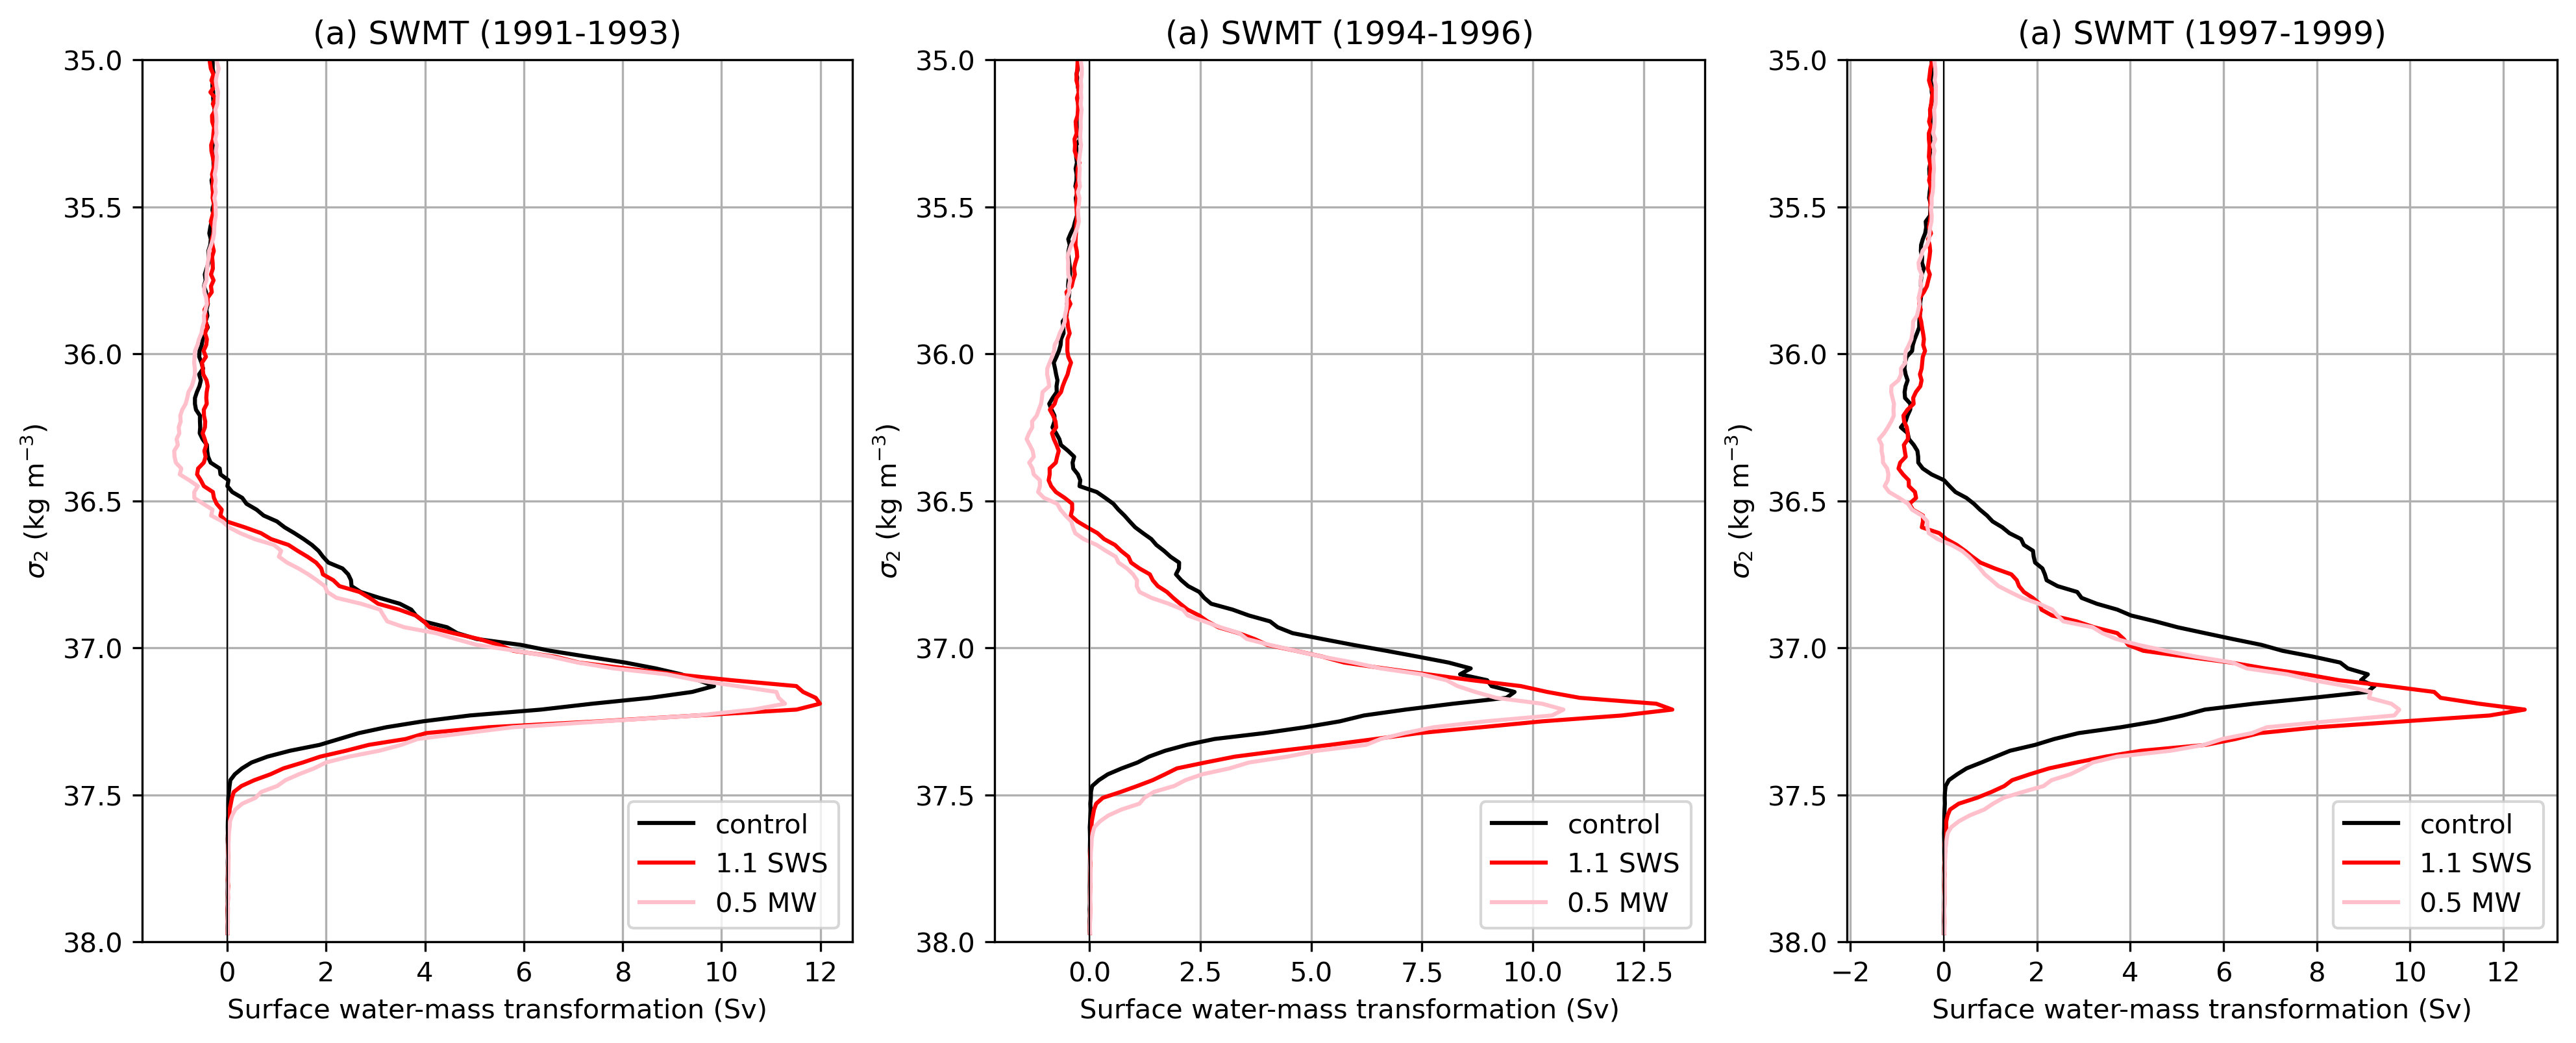

In [60]:
figure = plt.figure(dpi=300, figsize = (16,6))
plt.subplot(1,3,1)
plt.plot(swmt_shelf_sum_con_1,isopycnal_bin_mid, color = 'k', label='control')
plt.plot(swmt_shelf_sum_up_1,isopycnal_bin_mid, color = 'r', label='1.1 SWS')
plt.plot(swmt_shelf_sum_melt_3_1,isopycnal_bin_mid, color = 'pink', label='0.5 MW')
plt.plot([0, 0],[38, 35], 'k', linewidth=0.5)
plt.ylim((38, 35))
plt.ylabel(r'$\sigma_{2}$ (kg m$^{-3}$)', fontsize = 10)
plt.xlabel('Surface water-mass transformation (Sv)', fontsize=10)
plt.title('(a) SWMT (1991-1993)')
plt.grid()
plt.legend(loc=4, fontsize = 10);

plt.subplot(1,3,2)
plt.plot(swmt_shelf_sum_con_2,isopycnal_bin_mid, color = 'k', label='control')
plt.plot(swmt_shelf_sum_up_2,isopycnal_bin_mid, color = 'r', label='1.1 SWS')
plt.plot(swmt_shelf_sum_melt_3_2,isopycnal_bin_mid, color = 'pink', label='0.5 MW')
plt.plot([0, 0],[38, 35], 'k', linewidth=0.5)
plt.ylim((38, 35))
plt.ylabel(r'$\sigma_{2}$ (kg m$^{-3}$)', fontsize = 10)
plt.xlabel('Surface water-mass transformation (Sv)', fontsize=10)
plt.title('(a) SWMT (1994-1996)')
plt.grid()
plt.legend(loc=4, fontsize = 10);

plt.subplot(1,3,3)
plt.plot(swmt_shelf_sum_con_3,isopycnal_bin_mid, color = 'k', label='control')
plt.plot(swmt_shelf_sum_up_3,isopycnal_bin_mid, color = 'r', label='1.1 SWS')
plt.plot(swmt_shelf_sum_melt_3_3,isopycnal_bin_mid, color = 'pink', label='0.5 MW')
plt.plot([0, 0],[38, 35], 'k', linewidth=0.5)
plt.ylim((38, 35))
plt.ylabel(r'$\sigma_{2}$ (kg m$^{-3}$)', fontsize = 10)
plt.xlabel('Surface water-mass transformation (Sv)', fontsize=10)
plt.title('(a) SWMT (1997-1999)')
plt.grid()
plt.legend(loc=4, fontsize = 10);

In [49]:
# calculate the max transformation in Adelie
swmt_adelie_con = swmt_shelf_con.sel(yh = slice(-70,-63)).sel(xh = slice(-240,-200))
swmt_adelie_con_sum = (swmt_adelie_con * area_t/1e6).sum(['xh', 'yh']).values
swmt_adelie_up = swmt_shelf_up.sel(yh = slice(-70,-63)).sel(xh = slice(-240,-200))
swmt_adelie_up_sum = (swmt_adelie_up * area_t/1e6).sum(['xh', 'yh']).values

swmt_adelie_melt = swmt_shelf_melt.sel(yh = slice(-70,-63)).sel(xh = slice(-240,-200))
swmt_adelie_melt_sum = (swmt_adelie_melt * area_t/1e6).sum(['xh', 'yh']).values

In [50]:
# calculate the max transformation in Ross
swmt_ross_con = swmt_shelf_con.sel(yh = slice(-79,-65)).sel(xh = slice(-200,-170))
swmt_ross_con_sum = (swmt_ross_con * area_t/1e6).sum(['xh', 'yh']).values
swmt_ross_up = swmt_shelf_up.sel(yh = slice(-79,-65)).sel(xh = slice(-200,-170))
swmt_ross_up_sum = (swmt_ross_up * area_t/1e6).sum(['xh', 'yh']).values
swmt_ross_melt = swmt_shelf_melt.sel(yh = slice(-79,-65)).sel(xh = slice(-200,-170))
swmt_ross_melt_sum = (swmt_ross_melt * area_t/1e6).sum(['xh', 'yh']).values

In [51]:
swmt_shelf_sum_melt.max()

9.658892282526123

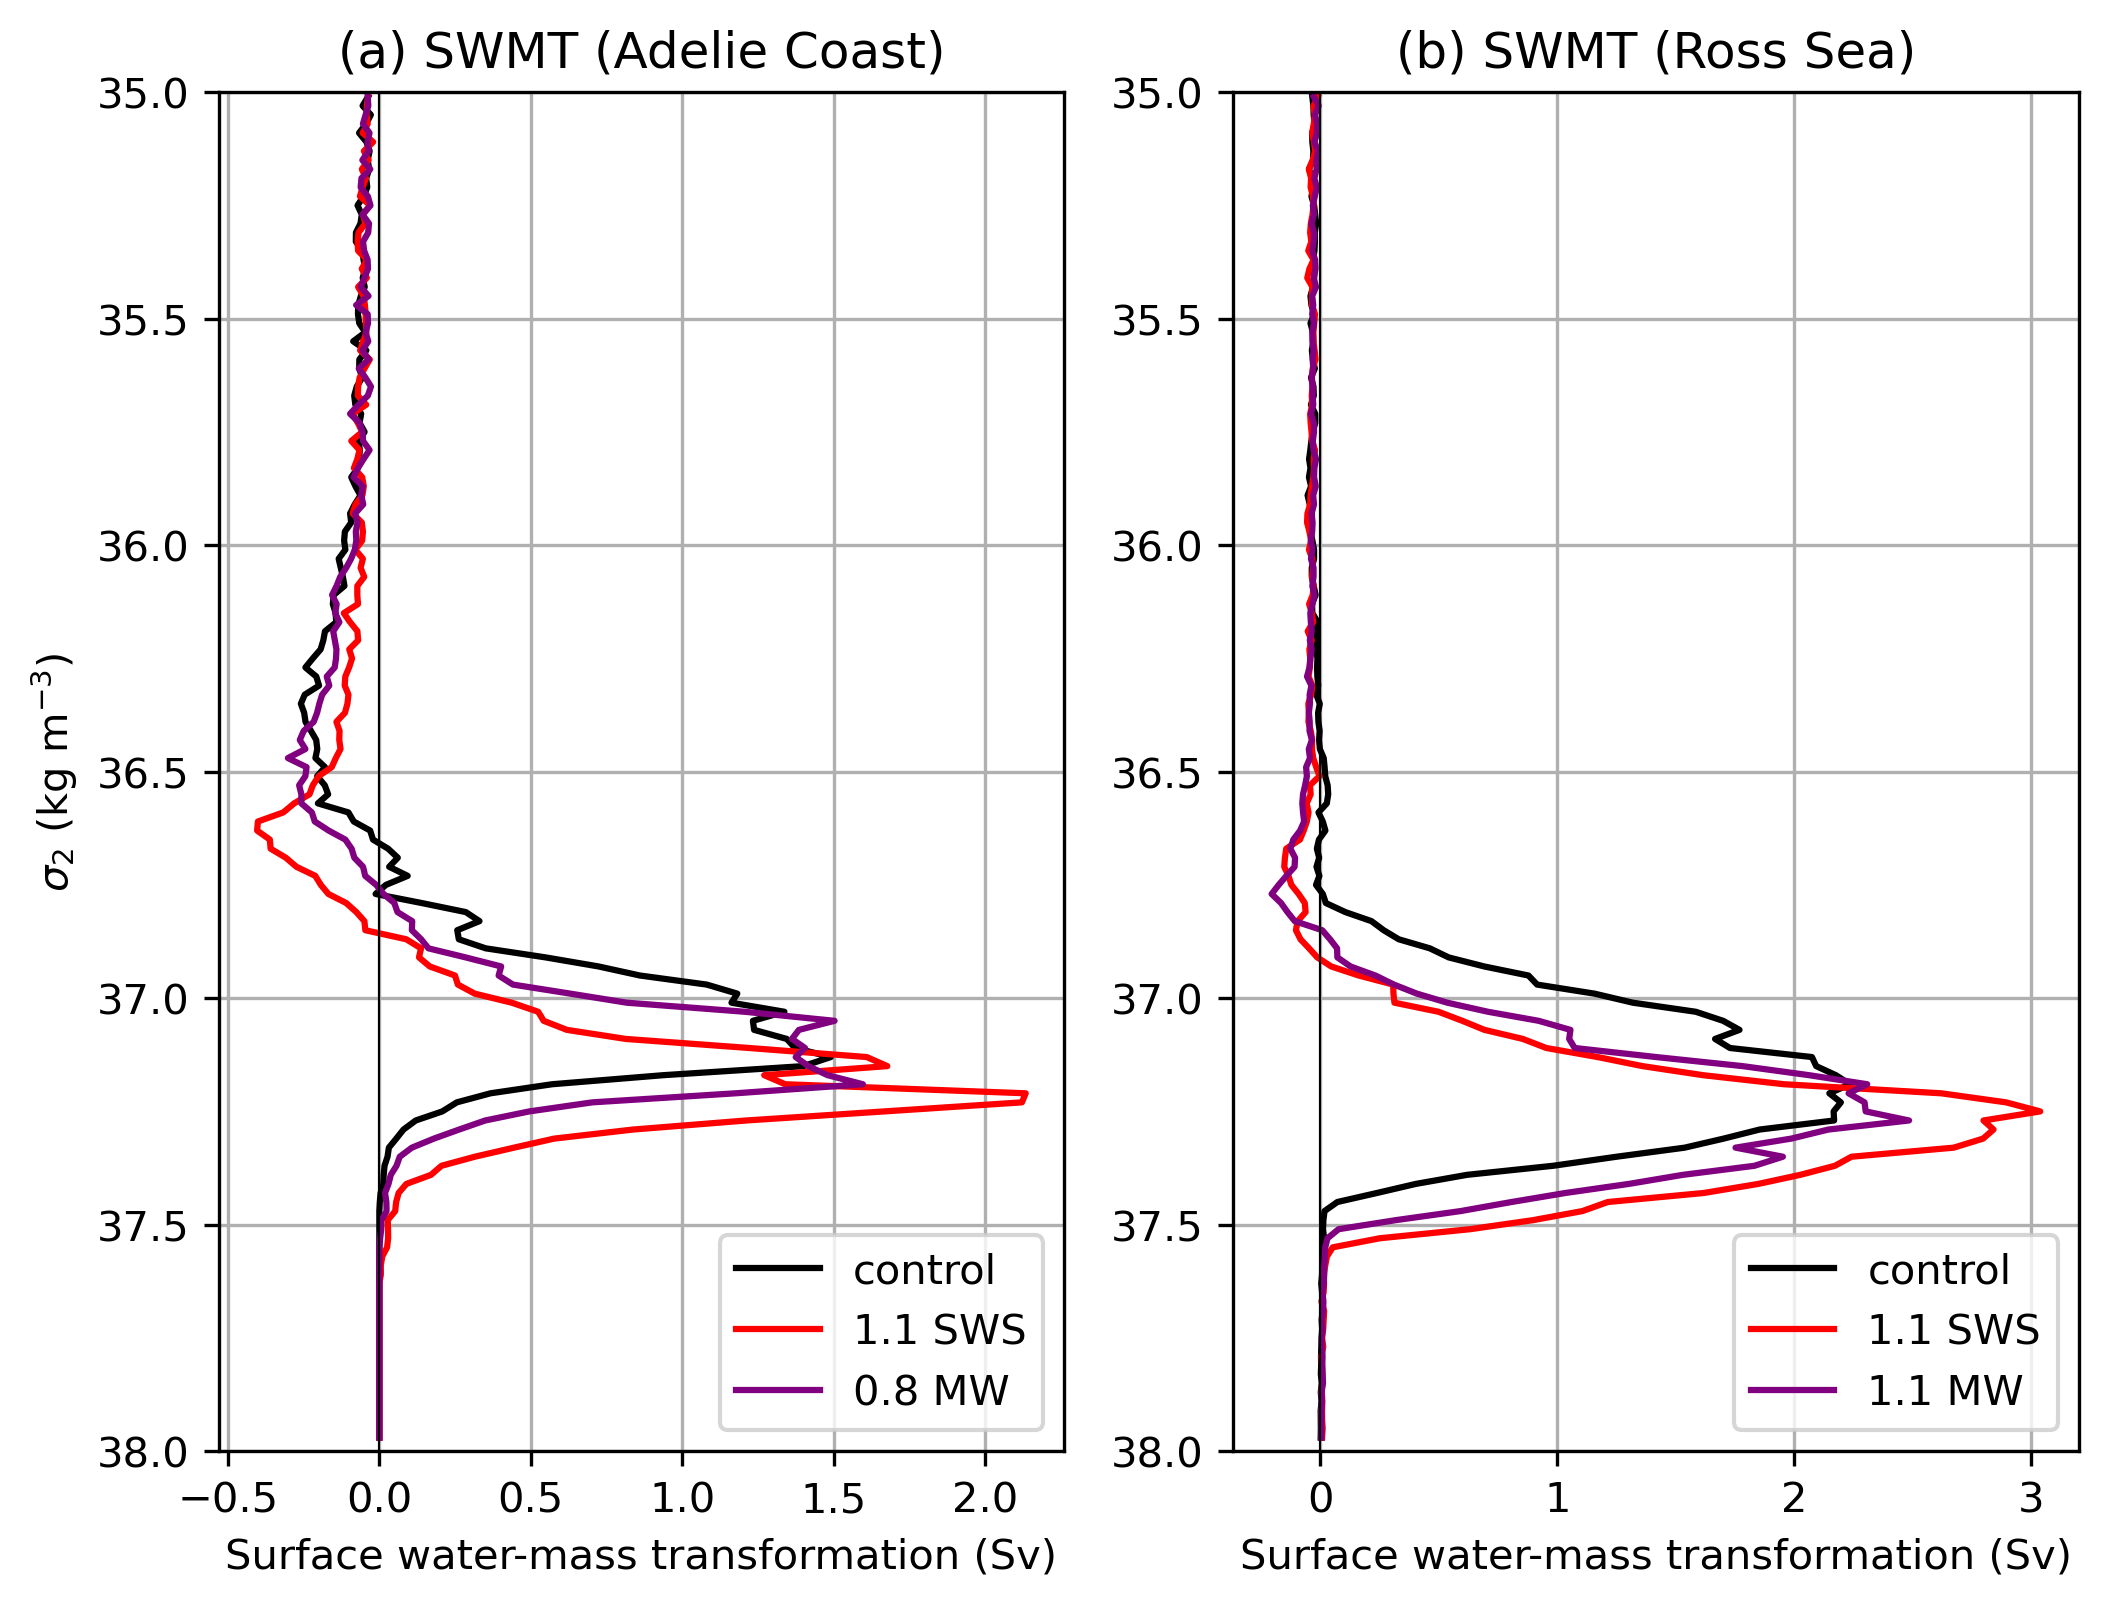

In [52]:
figure = plt.figure(dpi=300, figsize = (8,6))
plt.subplot(1,2,1)
plt.plot(swmt_adelie_con_sum,isopycnal_bin_mid, color = 'k', label='control')
plt.plot(swmt_adelie_up_sum,isopycnal_bin_mid, color = 'r', label='1.1 SWS')
plt.plot(swmt_adelie_melt_sum,isopycnal_bin_mid, color = 'purple', label='0.8 MW')
plt.plot([0, 0],[38, 35], 'k', linewidth=0.5)
plt.ylim((38, 35))
plt.ylabel(r'$\sigma_{2}$ (kg m$^{-3}$)', fontsize = 10)
plt.xlabel('Surface water-mass transformation (Sv)', fontsize=10)
plt.title('(a) SWMT (Adelie Coast)')
plt.grid()
plt.legend(loc=4, fontsize = 10);

plt.subplot(1,2,2)
plt.plot(swmt_ross_con_sum,isopycnal_bin_mid, color = 'k', label='control')
plt.plot(swmt_ross_up_sum,isopycnal_bin_mid, color = 'r', label='1.1 SWS')
plt.plot(swmt_ross_melt_sum,isopycnal_bin_mid, color = 'purple', label='1.1 MW')
plt.plot([0, 0],[38, 35], 'k', linewidth=0.5)
plt.ylim((38, 35))
plt.grid()
plt.xlabel('Surface water-mass transformation (Sv)', fontsize=10)
plt.title('(b) SWMT (Ross Sea)')
plt.legend(loc=4, fontsize = 10);

In [53]:
# find the density at the max transport
# Ross sea
max_ross_index_con = np.argmax(swmt_ross_con_sum) 
max_ross_index_up = np.argmax(swmt_ross_up_sum) 
max_ross_index_melt = np.argmax(swmt_ross_melt_sum) 

max_ross_density_con = isopycnal_bin_mid[max_ross_index_con]
max_ross_density_up = isopycnal_bin_mid[max_ross_index_up]
max_ross_density_melt = isopycnal_bin_mid[max_ross_index_melt]

# adelie sea
max_adelie_index_con = np.argmax(swmt_adelie_con_sum) 
max_adelie_index_up = np.argmax(swmt_adelie_up_sum) 
max_adelie_index_melt = np.argmax(swmt_adelie_melt_sum) 


max_adelie_density_con = isopycnal_bin_mid[max_adelie_index_con]
max_adelie_density_up = isopycnal_bin_mid[max_adelie_index_up]
max_adelie_density_melt = isopycnal_bin_mid[max_adelie_index_melt]

In [54]:
[swmt_adelie_con_sum.max(),swmt_adelie_up_sum.max(),swmt_adelie_melt_sum.max()]

[1.4898248565575642, 2.132818295098353, 1.595607685120076]

In [55]:
[swmt_ross_con_sum.max(),swmt_ross_up_sum.max(),swmt_ross_melt_sum.max()]

[2.235357187357777, 3.0380645451066903, 2.4843336488958894]

In [56]:
[max_ross_density_con,max_ross_density_up,max_ross_density_melt]

[<xarray.DataArray 'isopycnal_bins' ()>
 array(37.19)
 Coordinates:
     isopycnal_bins  float64 37.19,
 <xarray.DataArray 'isopycnal_bins' ()>
 array(37.25)
 Coordinates:
     isopycnal_bins  float64 37.25,
 <xarray.DataArray 'isopycnal_bins' ()>
 array(37.27)
 Coordinates:
     isopycnal_bins  float64 37.27]

In [57]:
[max_adelie_density_con,max_adelie_density_up,max_adelie_density_melt]

[<xarray.DataArray 'isopycnal_bins' ()>
 array(37.13)
 Coordinates:
     isopycnal_bins  float64 37.13,
 <xarray.DataArray 'isopycnal_bins' ()>
 array(37.21)
 Coordinates:
     isopycnal_bins  float64 37.21,
 <xarray.DataArray 'isopycnal_bins' ()>
 array(37.19)
 Coordinates:
     isopycnal_bins  float64 37.19]

In [58]:
# calculate subducting waters in adelie coast
shelf_subduction_plot_con = swmt_shelf_con.isel(isopycnal_bins = max_adelie_index_con)*1e5
swmt_xt = shelf_subduction_plot_con.xh
swmt_yt = shelf_subduction_plot_con.yh

shelf_subduction_plot_up = swmt_shelf_up.isel(isopycnal_bins = max_adelie_index_up)*1e5
swmt_xt = shelf_subduction_plot_con.xh
swmt_yt = shelf_subduction_plot_con.yh

shelf_subduction_plot_melt = swmt_shelf_melt.isel(isopycnal_bins = max_adelie_index_melt)*1e5
swmt_xt = shelf_subduction_plot_con.xh
swmt_yt = shelf_subduction_plot_con.yh

Text(0, 0.5, 'subducting speed ($10^{-5}$m s$^{-1}$)')

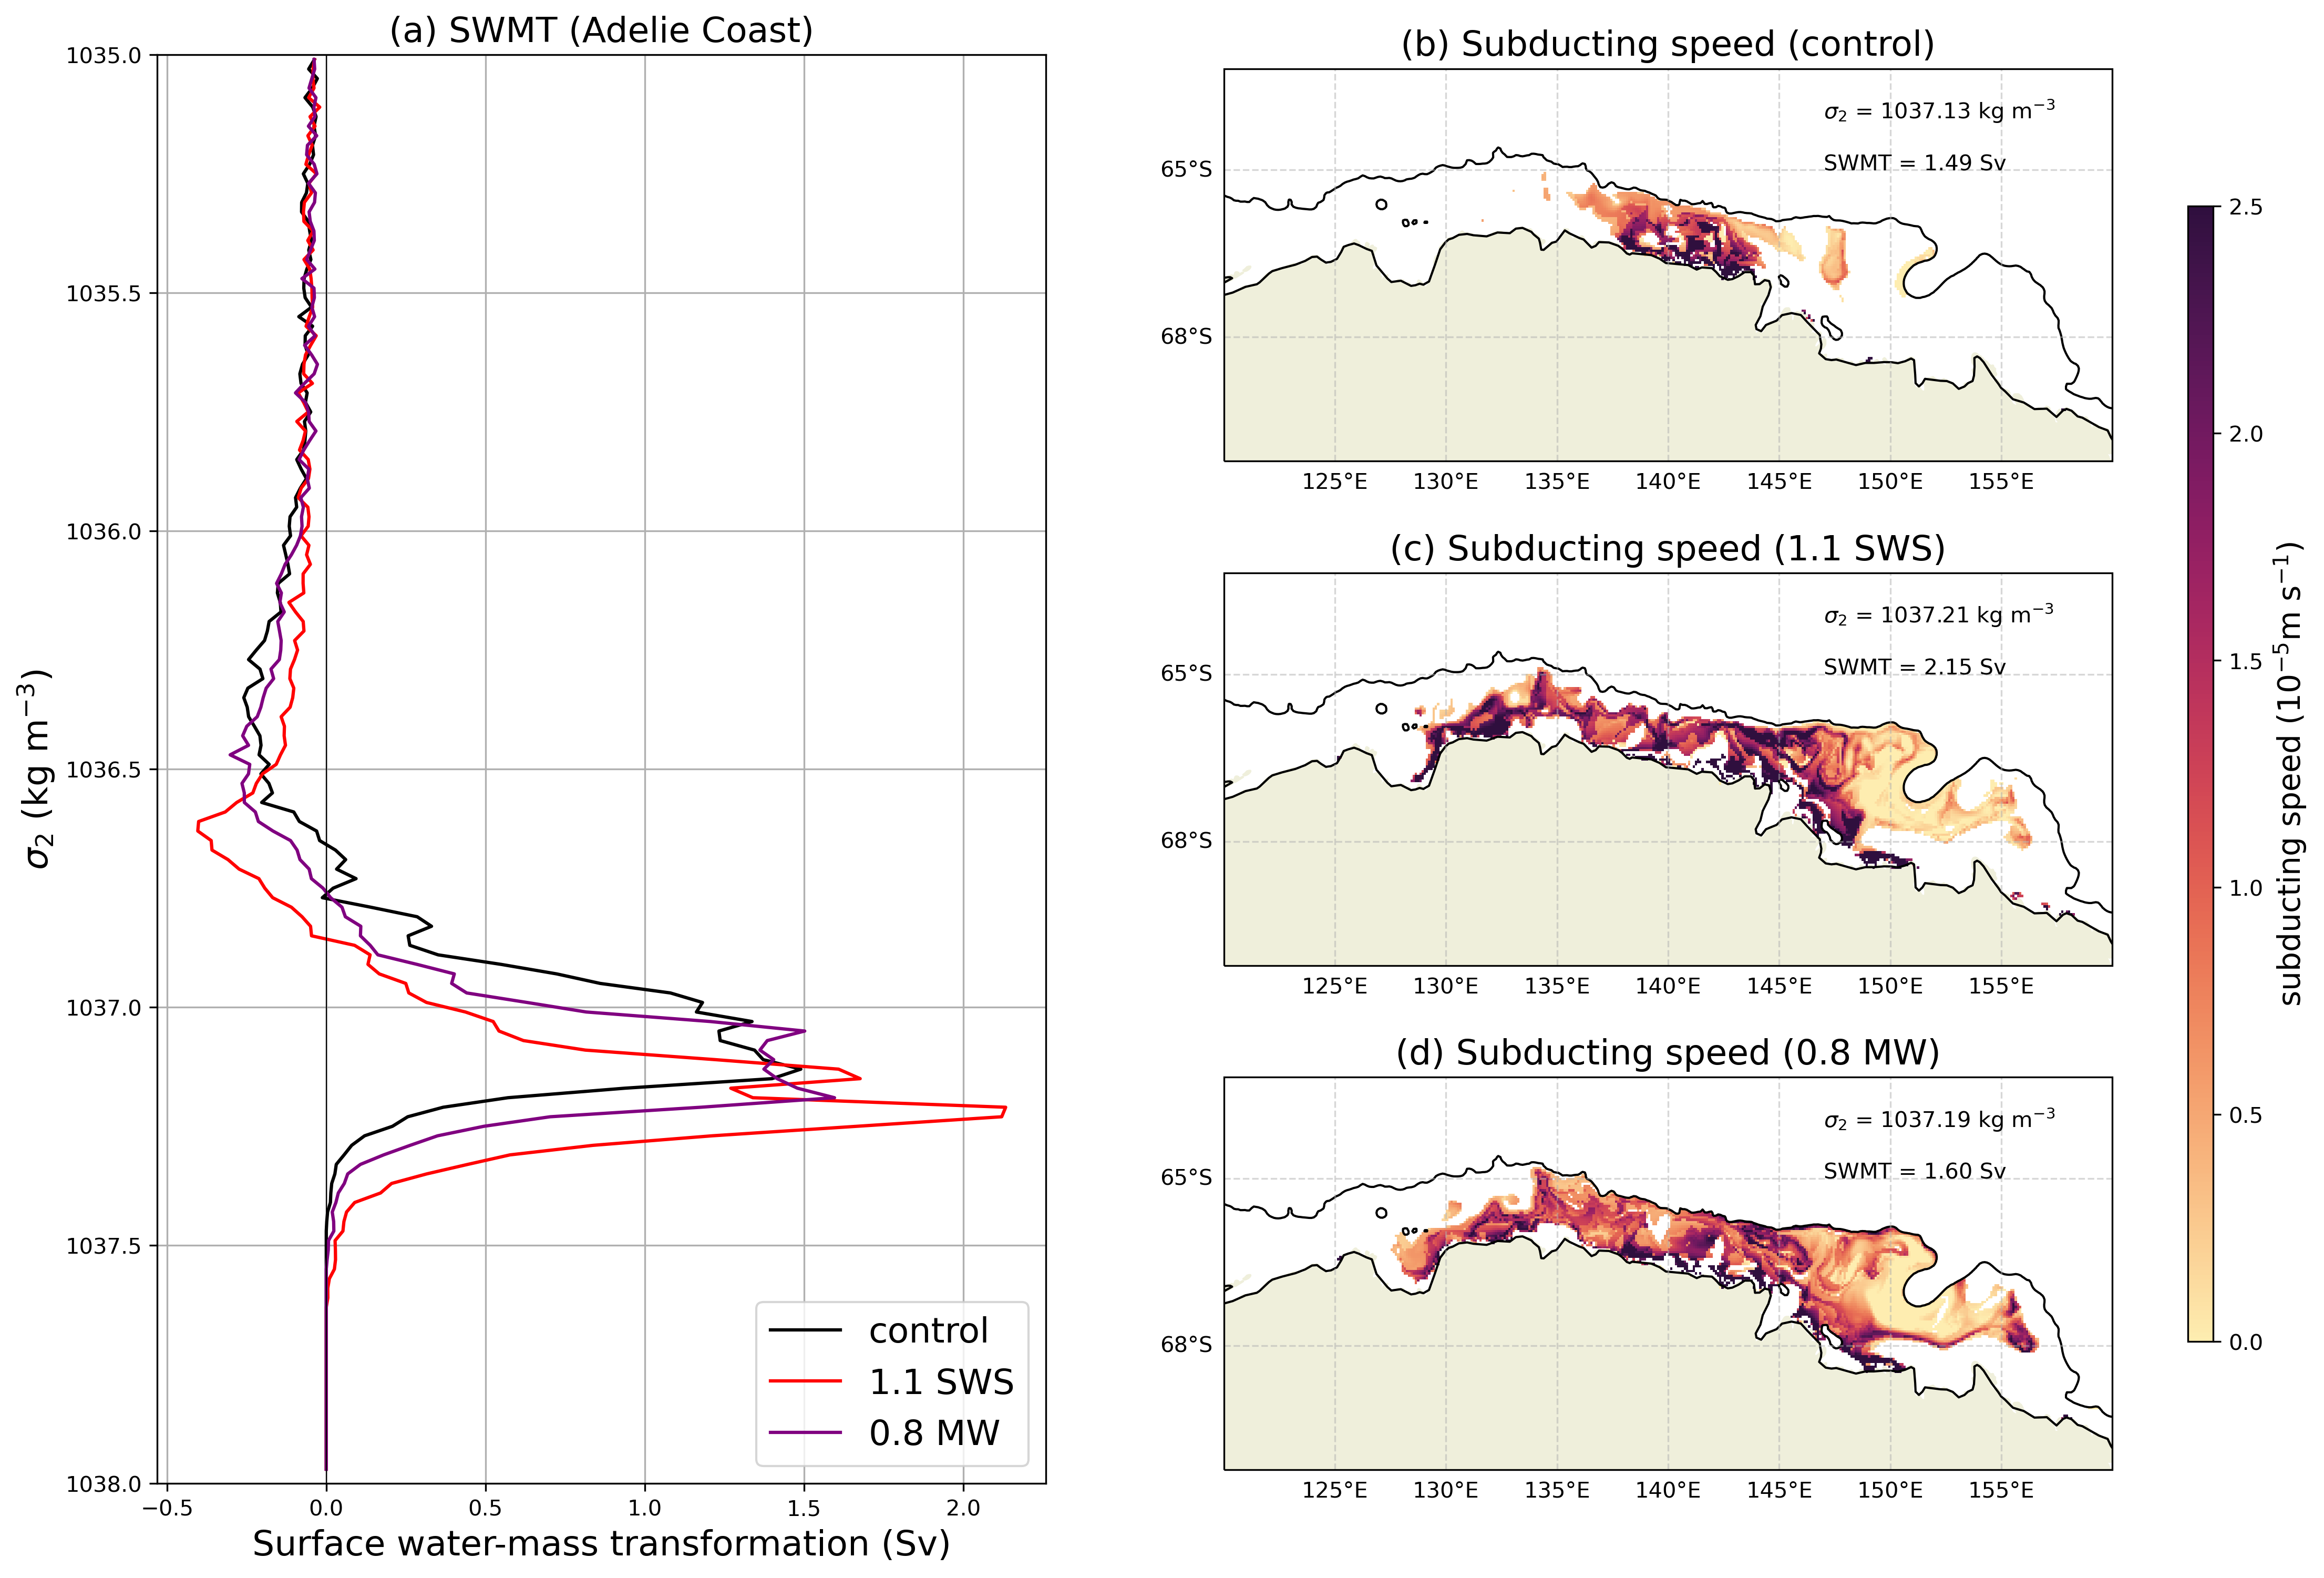

In [63]:
# SWMT in Adelie Coast
# control
projection=ccrs.Mercator(min_latitude=-70.0, max_latitude=-63.0)
fig = plt.figure(figsize=(16, 12), dpi=300)
ax = plt.subplot(3, 2, 2, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([120, 160, -75, -50], crs=ccrs.PlateCarree())
lb =ax.gridlines(draw_labels=True,linestyle='--',alpha=0.5)
lb.xlabels_top = False
lb.ylabels_right = False
lb.ylocator = mticker.FixedLocator([-68, -65,-60])
p1 = shelf_subduction_plot_con.plot(vmin=0, vmax=2.5, cmap=cm.cm.matter,transform=ccrs.PlateCarree(),add_colorbar=False)
deptho.plot.contour(ax=ax,levels=[1000],linewidths = 1,colors=['k'],transform=ccrs.PlateCarree())
ax.text(147,-64,'$\sigma_{2}$ = 1037.13 kg m$^{-3}$',transform=ccrs.PlateCarree())
ax.text(147,-65,'SWMT = 1.49 Sv',transform=ccrs.PlateCarree())
#ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('(b) Subducting speed (control)', fontsize = 16)
ax. grid(False)
# up
ax = plt.subplot(3, 2, 4, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([120, 160, -75, -50], crs=ccrs.PlateCarree())
lb =ax.gridlines(draw_labels=True,linestyle='--',alpha=0.5)
lb.xlabels_top = False
lb.ylabels_right = False
lb.ylocator = mticker.FixedLocator([-68, -65,-60])
p1 = shelf_subduction_plot_up.plot(vmin=0, vmax=2.5, cmap=cm.cm.matter,transform=ccrs.PlateCarree(),add_colorbar=False)
deptho.plot.contour(ax=ax,levels=[1000],linewidths = 1,colors=['k'],transform=ccrs.PlateCarree())
ax.text(147,-64,'$\sigma_{2}$ = 1037.21 kg m$^{-3}$',transform=ccrs.PlateCarree())
ax.text(147,-65,'SWMT = 2.15 Sv',transform=ccrs.PlateCarree())
#ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('(c) Subducting speed (1.1 SWS)', fontsize = 16)
ax. grid(False)

# melt
ax = plt.subplot(3, 2, 6, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([120, 160, -75, -50], crs=ccrs.PlateCarree())
lb =ax.gridlines(draw_labels=True,linestyle='--',alpha=0.5)
lb.xlabels_top = False
lb.ylabels_right = False
lb.ylocator = mticker.FixedLocator([-68, -65,-60])
p1 = shelf_subduction_plot_melt.plot(vmin=0, vmax=2.5, cmap=cm.cm.matter,transform=ccrs.PlateCarree(),add_colorbar=False)
deptho.plot.contour(ax=ax,levels=[1000],linewidths = 1,colors=['k'],transform=ccrs.PlateCarree())
ax.text(147,-64,'$\sigma_{2}$ = 1037.19 kg m$^{-3}$',transform=ccrs.PlateCarree())
ax.text(147,-65,'SWMT = 1.60 Sv',transform=ccrs.PlateCarree())
#ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('(d) Subducting speed (0.8 MW)', fontsize = 16)
ax. grid(False)

plt.subplot(1,2,1)
plt.plot(swmt_adelie_con_sum,isopycnal_bin_mid+1000, color = 'k', label='control')
plt.plot(swmt_adelie_up_sum,isopycnal_bin_mid+1000, color = 'r', label='1.1 SWS')
plt.plot(swmt_adelie_melt_sum,isopycnal_bin_mid+1000, color = 'purple', label='0.8 MW')
plt.plot([0, 0],[1038, 1035], 'k', linewidth=0.5)
plt.ylim((1038, 1035))
plt.ylabel(r'$\sigma_{2}$ (kg m$^{-3}$)', fontsize = 16)
plt.xlabel('Surface water-mass transformation (Sv)', fontsize=16)
plt.title('(a) SWMT (Adelie Coast)', fontsize = 16)
plt.grid()
plt.legend(loc=4, fontsize = 16);

# colorbar 
ax = plt.axes([0.93, 0.2, 0.01, 0.6])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'neither')
cb.ax.set_ylabel('subducting speed ($10^{-5}$m s$^{-1}$)',fontsize = 14)

In [60]:
# calculate subducting waters in ross coast
shelf_subduction_plot_con = swmt_shelf_con.isel(isopycnal_bins = max_ross_index_con)*1e5
swmt_xt = shelf_subduction_plot_con.xh
swmt_yt = shelf_subduction_plot_con.yh

shelf_subduction_plot_up = swmt_shelf_up.isel(isopycnal_bins = max_ross_index_up)*1e5
swmt_xt = shelf_subduction_plot_up.xh
swmt_yt = shelf_subduction_plot_up.yh

Text(0, 0.5, 'subducting speed ($10^{-5}$m s$^{-1}$)')

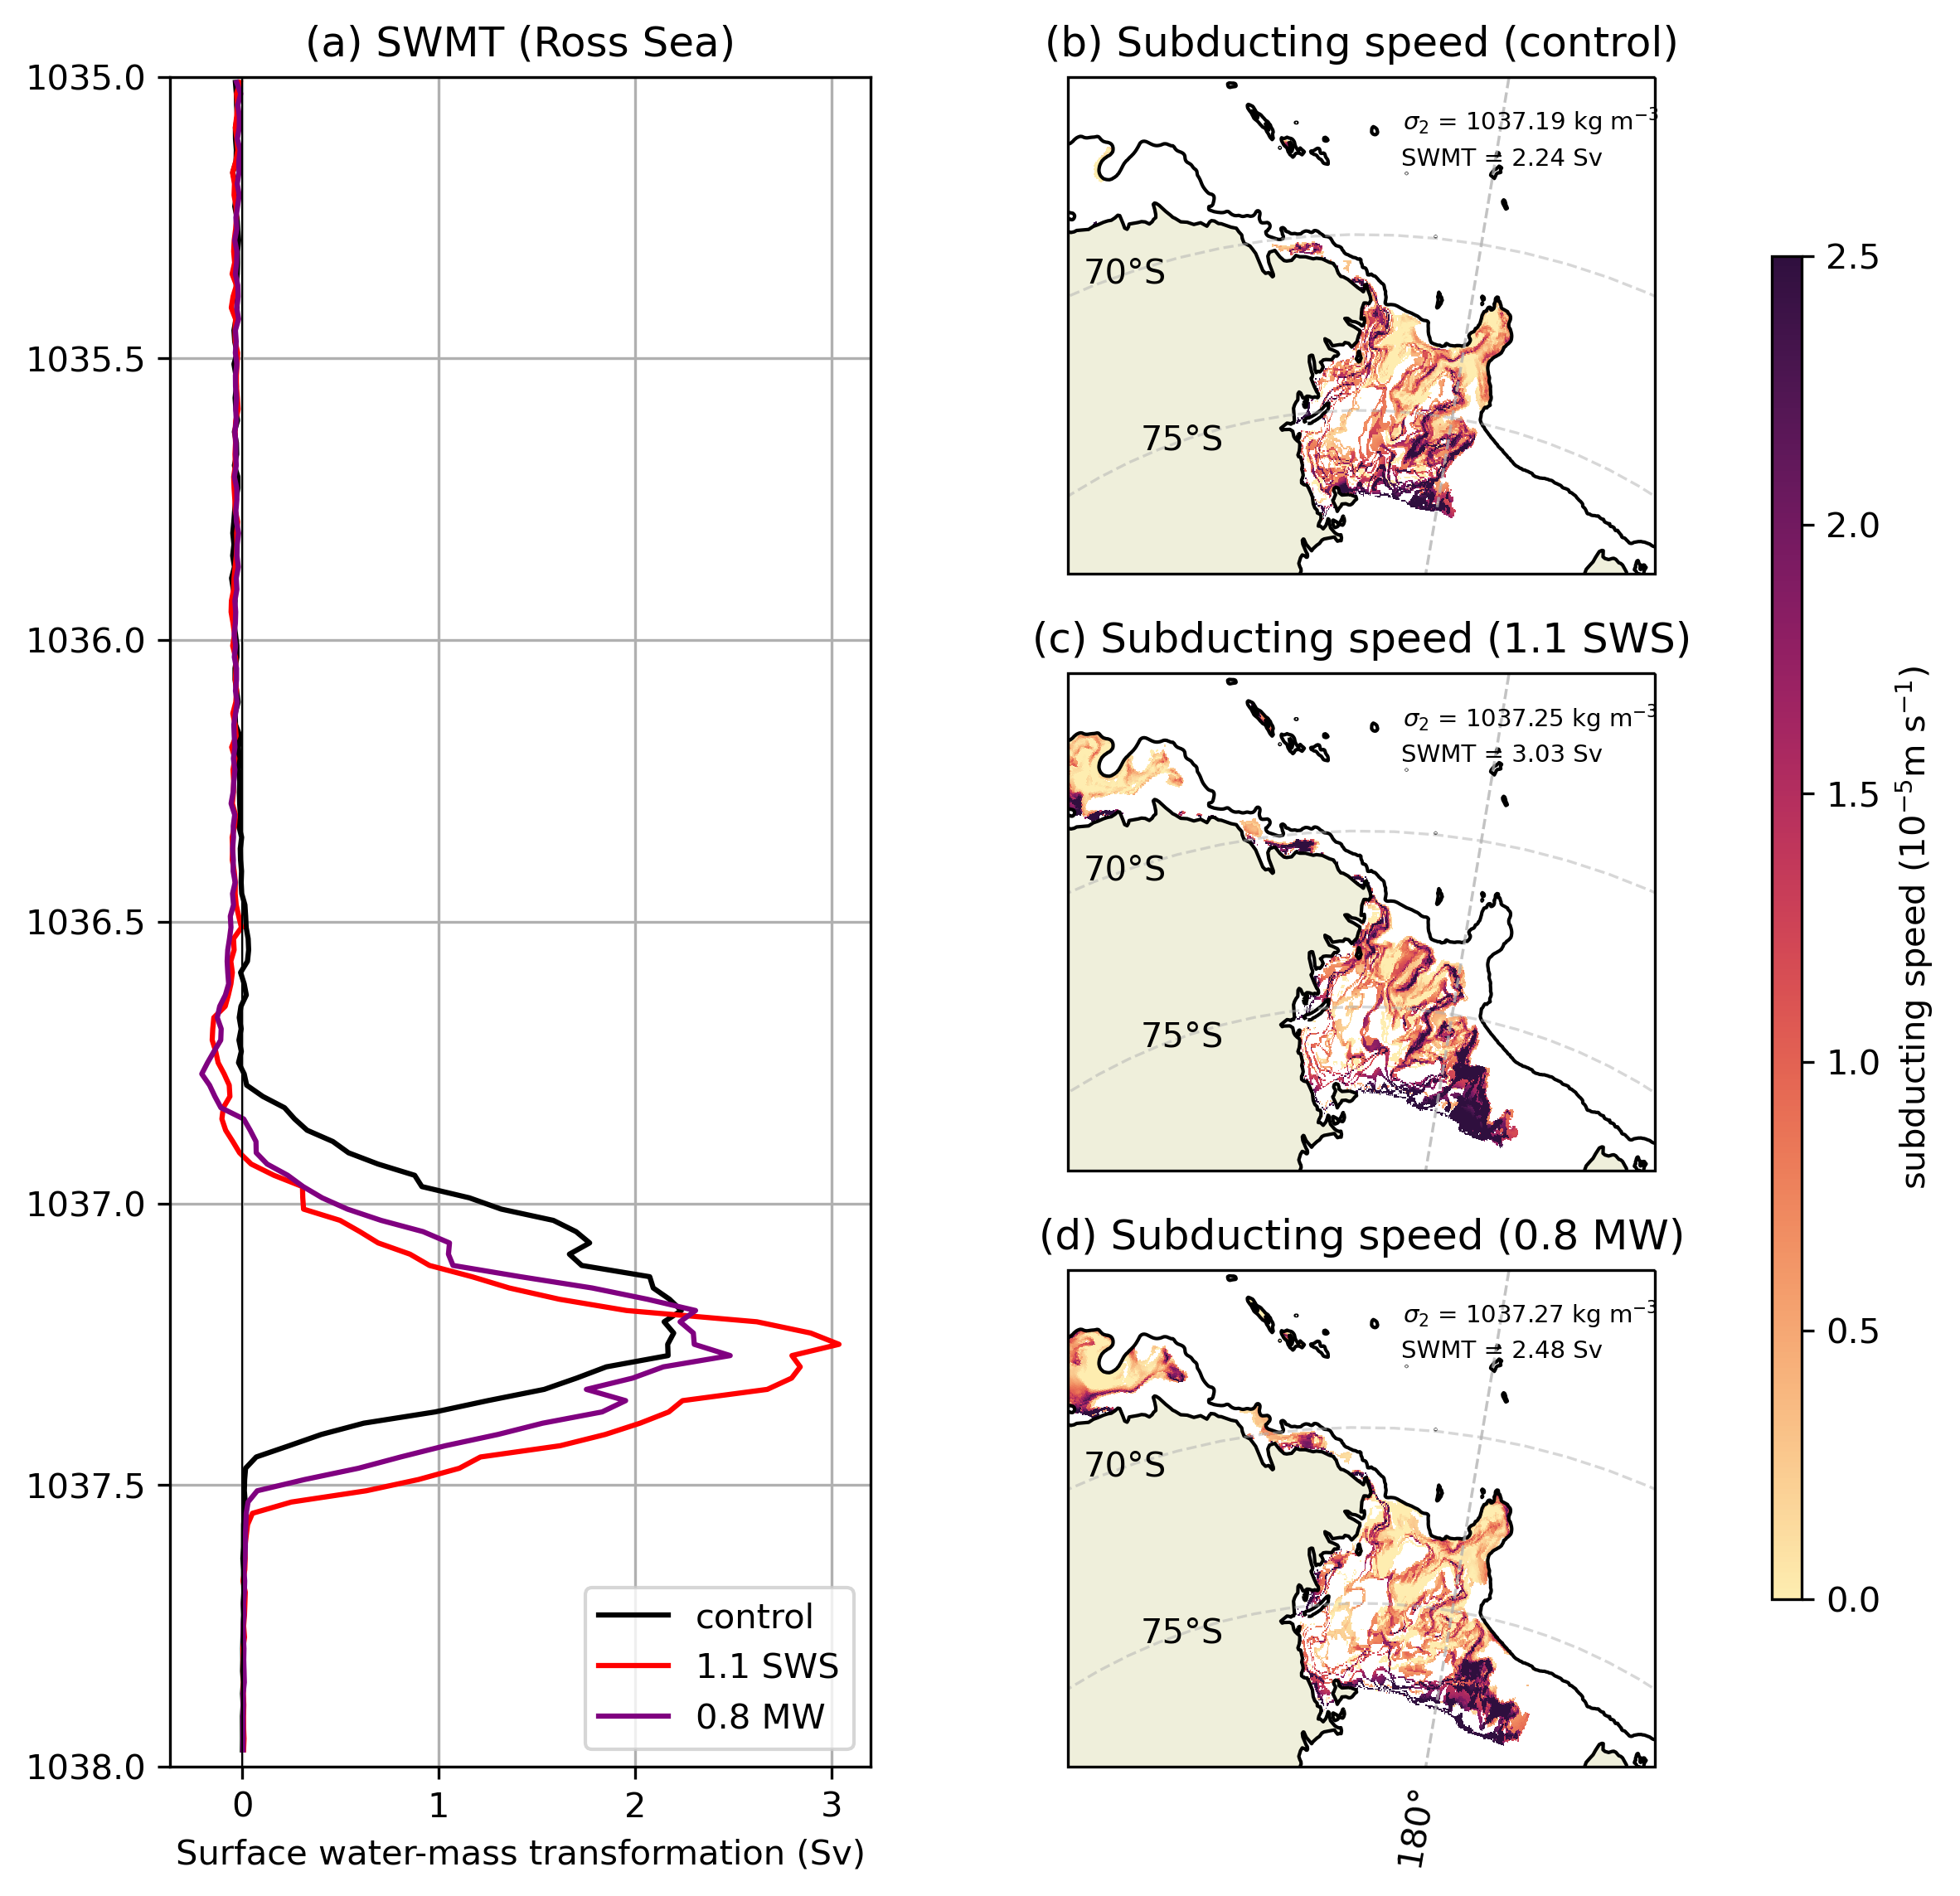

In [61]:
# SWMT in Ross Sea
# control
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)
fig = plt.figure(figsize=(8, 9), dpi=300)
ax = plt.subplot(3, 2, 2, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
lb =ax.gridlines(draw_labels=True,linestyle='--',alpha=0.5)
lb.xlabels_top = False
lb.ylabels_right = False
lb.xlabels_bottom = False
lb.ylocator = mticker.FixedLocator([-75,-70, -60])
p1 = shelf_subduction_plot_con.plot(vmin=0, vmax=2.5, cmap=cm.cm.matter,transform=ccrs.PlateCarree(),add_colorbar=False)
deptho.plot.contour(ax=ax,levels=[1000],linewidths = 1,colors=['k'],transform=ccrs.PlateCarree())
#ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('(b) Subducting speed (control)')
ax.text(173,-67,'$\sigma_{2}$ = 1037.19 kg m$^{-3}$',fontsize = 7,transform=ccrs.PlateCarree())
ax.text(173,-68,'SWMT = 2.24 Sv',fontsize = 7,transform=ccrs.PlateCarree())
ax. grid(False)
# up
ax = plt.subplot(3, 2, 4, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
lb =ax.gridlines(draw_labels=True,linestyle='--',alpha=0.5)
lb.xlabels_top = False
lb.ylabels_right = False
lb.xlabels_bottom = False
lb.ylocator = mticker.FixedLocator([-75,-70,-60])
p1 = shelf_subduction_plot_up.plot(vmin=0, vmax=2.5, cmap=cm.cm.matter,transform=ccrs.PlateCarree(),add_colorbar=False)
deptho.plot.contour(ax=ax,levels=[1000],linewidths = 1,colors=['k'],transform=ccrs.PlateCarree())
ax.text(173,-67,'$\sigma_{2}$ = 1037.25 kg m$^{-3}$',fontsize = 7,transform=ccrs.PlateCarree())
ax.text(173,-68,'SWMT = 3.03 Sv',fontsize = 7,transform=ccrs.PlateCarree())
#ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('(c) Subducting speed (1.1 SWS)')
ax. grid(False)

# melt
ax = plt.subplot(3, 2, 6, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
lb =ax.gridlines(draw_labels=True,linestyle='--',alpha=0.5)
lb.xlabels_top = False
lb.ylabels_right = False
lb.ylocator = mticker.FixedLocator([-75,-70,-60])
p1 = shelf_subduction_plot_melt.plot(vmin=0, vmax=2.5, cmap=cm.cm.matter,transform=ccrs.PlateCarree(),add_colorbar=False)
deptho.plot.contour(ax=ax,levels=[1000],linewidths = 1,colors=['k'],transform=ccrs.PlateCarree())
ax.text(173,-67,'$\sigma_{2}$ = 1037.27 kg m$^{-3}$',fontsize = 7,transform=ccrs.PlateCarree())
ax.text(173,-68,'SWMT = 2.48 Sv',fontsize = 7,transform=ccrs.PlateCarree())
#ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('(d) Subducting speed (0.8 MW)')
ax. grid(False)

plt.subplot(1,2,1)
plt.plot(swmt_ross_con_sum,isopycnal_bin_mid+1000, color = 'k', label='control')
plt.plot(swmt_ross_up_sum,isopycnal_bin_mid+1000, color = 'r', label='1.1 SWS')
plt.plot(swmt_ross_melt_sum,isopycnal_bin_mid+1000, color = 'purple', label='0.8 MW')
plt.plot([0, 0],[1038, 1035], 'k', linewidth=0.5)
plt.ylim((1038, 1035))
plt.grid()

plt.xlabel('Surface water-mass transformation (Sv)', fontsize=10)
plt.title('(a) SWMT (Ross Sea)')
plt.legend(loc=4, fontsize = 14);


# colorbar 
ax = plt.axes([0.93, 0.2, 0.015, 0.6])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'neither')
cb.ax.set_ylabel('subducting speed ($10^{-5}$m s$^{-1}$)',fontsize = 14)